In [15]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb

In [16]:
df = pd.read_csv('고객db_전처리.csv')
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,최근 거래 금액,누적 구매 금액,평균 구매 금액,할부 여부,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,고객 충성도 지수,고객 평생 가치
0,1,강주온,2002-03-04,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,33910000,33910000,51586471,0,신용카드,오프라인,1,0.000,0.023,779930
1,2,김경수,1983-01-02,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,84180000,84180000,61140833,1,신용카드,오프라인,5,0.027,0.284,23907120
2,3,김다은,1999-05-02,26,20대 중반,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,71720000,71720000,47520000,1,계좌이체,오프라인,1,0.009,0.048,3442560
3,4,김민수,1960-07-01,65,60대 중반,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,51230000,51230000,57152308,1,현금,오프라인,1,0.000,0.035,1793050
4,5,김승현,1970-03-02,55,50대 중반,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,49040000,49040000,53551538,1,신용카드,오프라인,1,0.000,0.033,1618320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958-07-11,67,60대 후반,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,89230000,819560000,58540000,1,신용카드,온라인,2,0.006,1.107,907252920
287,289,최춘자,1976-06-27,49,40대 후반,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,38690000,724700000,51764286,0,현금,오프라인,3,0.026,1.468,1063859600
288,290,차서준,1968-01-22,57,50대 후반,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,71140000,839310000,64562308,1,계좌이체,온라인,2,0.005,1.133,950938230
289,291,안정희,1984-01-10,41,40대 초반,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,83950000,953250000,52958333,1,현금,온라인,2,0.007,1.287,1226832750


In [17]:
X = df[["신차 구매 지수", "고객 충성도 지수", "고객 평생 가치"]]
X

,신차 구매 지수,고객 충성도 지수,고객 평생 가치
0,0.000,0.023,779930
1,0.027,0.284,23907120
2,0.009,0.048,3442560
3,0.000,0.035,1793050
4,0.000,0.033,1618320
...,...,...,...
286,0.006,1.107,907252920
287,0.026,1.468,1063859600
288,0.005,1.133,950938230
289,0.007,1.287,1226832750


In [18]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

In [19]:
print('최적의 K값 결정')
max_k = min(10, X.shape[0])
print(f'데이터 개수: {X.shape[0]} / 최대 클러스터 개수: {max_k}')

최적의 K값 결정
데이터 개수: 291 / 최대 클러스터 개수: 10


In [20]:
wcss = []
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=4, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

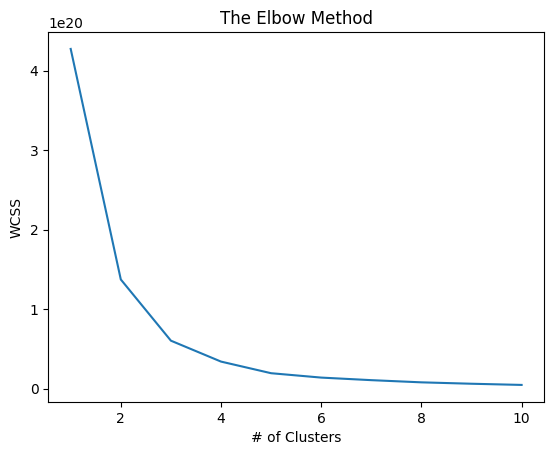

In [21]:
plt.plot(range(1, max_k + 1), wcss)
plt.title('The Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

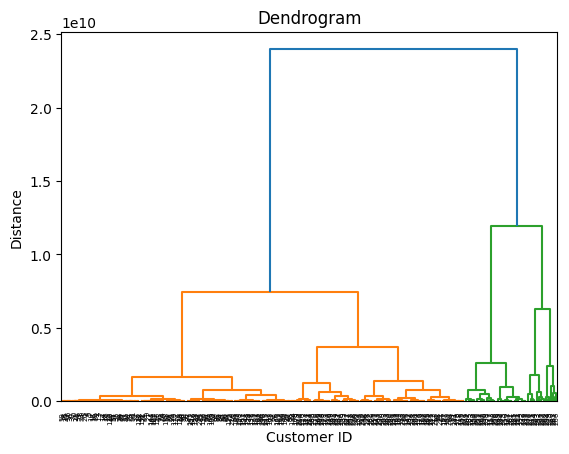

In [22]:
sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customer ID')
plt.ylabel('Distance')
#plt.savefig('Dendrogram.jpg')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=6, random_state=4)
df['고객 그룹'] = kmeans.fit_predict(X)
print('✅ 그룹 정보가 저장되었습니다.')

✅ 그룹 정보가 저장되었습니다.


In [24]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,누적 구매 금액,평균 구매 금액,할부 여부,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,고객 충성도 지수,고객 평생 가치,고객 그룹
0,1,강주온,2002-03-04,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,33910000,51586471,0,신용카드,오프라인,1,0.000,0.023,779930,1
1,2,김경수,1983-01-02,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,84180000,61140833,1,신용카드,오프라인,5,0.027,0.284,23907120,1
2,3,김다은,1999-05-02,26,20대 중반,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,71720000,47520000,1,계좌이체,오프라인,1,0.009,0.048,3442560,1
3,4,김민수,1960-07-01,65,60대 중반,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,51230000,57152308,1,현금,오프라인,1,0.000,0.035,1793050,1
4,5,김승현,1970-03-02,55,50대 중반,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,49040000,53551538,1,신용카드,오프라인,1,0.000,0.033,1618320,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958-07-11,67,60대 후반,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,819560000,58540000,1,신용카드,온라인,2,0.006,1.107,907252920,3
287,289,최춘자,1976-06-27,49,40대 후반,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,724700000,51764286,0,현금,오프라인,3,0.026,1.468,1063859600,3
288,290,차서준,1968-01-22,57,50대 후반,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,839310000,64562308,1,계좌이체,온라인,2,0.005,1.133,950938230,3
289,291,안정희,1984-01-10,41,40대 초반,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,953250000,52958333,1,현금,온라인,2,0.007,1.287,1226832750,3


In [25]:
df.loc[df["고객 그룹"] == 4, ["아이디", "신차 구매 지수", "고객 충성도 지수", "고객 평생 가치", "고객 그룹"]]

,아이디,신차 구매 지수,고객 충성도 지수,고객 평생 가치,고객 그룹
209,hyeonju95,0.016,3.278,3183134680,4
215,ui,0.016,3.774,4219558440,4
224,bagseungmin,0.023,3.806,4291950080,4
231,dohyeonbae,0.053,3.855,4402332900,4
235,gwangsu15,0.037,3.297,4025406210,4
237,doyungim,0.057,3.442,3509532040,4
243,bagdoyun,0.122,2.523,3143102940,4
253,sanghunhwang,0.012,2.746,3723411240,4
260,jeongsugang,0.013,3.453,3532315410,4
265,xgim,0.017,3.368,3360994560,4


In [26]:
# 클러스터명 변경
group_mapping = {
    0 : "SPC",
    1 : "EVC",
    2 : "EVS",
    3 : "BVC",
    4 : "RSC",
    5 : "FMB"
}

df["고객 그룹"] = df["고객 그룹"].map(group_mapping)

In [29]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,누적 구매 금액,평균 구매 금액,할부 여부,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,고객 충성도 지수,고객 평생 가치,고객 그룹
0,1,강주온,2002-03-04,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,33910000,51586471,0,신용카드,오프라인,1,0.000,0.023,779930,EVC
1,2,김경수,1983-01-02,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,84180000,61140833,1,신용카드,오프라인,5,0.027,0.284,23907120,EVC
2,3,김다은,1999-05-02,26,20대 중반,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,71720000,47520000,1,계좌이체,오프라인,1,0.009,0.048,3442560,EVC
3,4,김민수,1960-07-01,65,60대 중반,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,51230000,57152308,1,현금,오프라인,1,0.000,0.035,1793050,EVC
4,5,김승현,1970-03-02,55,50대 중반,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,49040000,53551538,1,신용카드,오프라인,1,0.000,0.033,1618320,EVC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958-07-11,67,60대 후반,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,819560000,58540000,1,신용카드,온라인,2,0.006,1.107,907252920,BVC
287,289,최춘자,1976-06-27,49,40대 후반,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,724700000,51764286,0,현금,오프라인,3,0.026,1.468,1063859600,BVC
288,290,차서준,1968-01-22,57,50대 후반,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,839310000,64562308,1,계좌이체,온라인,2,0.005,1.133,950938230,BVC
289,291,안정희,1984-01-10,41,40대 초반,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,953250000,52958333,1,현금,온라인,2,0.007,1.287,1226832750,BVC


In [30]:
df.to_csv("고객db_전처리.csv", index=False)

In [31]:
df.loc[:, "신차 구매 지수":].to_csv("고객db_전처리2.csv")